###  The performance of a machine learning model can be characterized in terms of the bias and the variance of the model.

##### Bias, Variance, and Irreducible Error

Consider a machine learning model that makes predictions for a predictive modeling task, such as regression or classification.

The performance of the model on the task can be described in terms of the prediction error on all examples not used to train the model. We will refer to this as the model error.

Error(Model)

The model error can be decomposed into three sources of error: 

<b>the variance of the model, the bias of the model, and the variance of the irreducible error in the data<b>.

###### Error(Model) = Variance(Model) + Bias(Model) + Variance(Irreducible Error)

In [6]:
# estimate the bias and variance for a regression model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
# load dataset
dataframe = read_csv('boston.csv')
dataframe.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [7]:
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

In [8]:
X

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [4.0000e+00, 3.2370e-02, 0.0000e+00, ..., 1.8700e+01, 3.9463e+02,
        2.9400e+00],
       ...,
       [5.0300e+02, 4.5270e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        9.0800e+00],
       [5.0400e+02, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [5.0600e+02, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
y

array([24. , 21.6, 33.4, 36.2, 22.9, 15. , 18.9, 21.7, 20.4, 18.2, 19.9,
       23.1, 20.2, 13.6, 19.6, 15.2, 14.5, 14.8, 12.7, 14.5, 13.5, 24.7,
       30.8, 34.9, 25.3, 24.7, 21.2, 19.3, 20. , 16.6, 19.4, 19.7, 20.5,
       23.4, 18.9, 35.4, 24.7, 31.6, 23.3, 18.7, 16. , 25. , 33. , 23.5,
       19.4, 22. , 17.4, 24.2, 22.8, 23.4, 24.1, 21.4, 20. , 20.8, 28. ,
       23.9, 22.9, 23.9, 26.6, 22.5, 22.2, 23.6, 28.7, 22.6, 25. , 20.6,
       21.4, 27.5, 26.5, 18.6, 19.3, 19.5, 20.4, 19.8, 19.4, 22.8, 18.5,
       21.2, 19.2, 20.4, 19.3, 22. , 20.3, 20.5, 17.3, 18.8, 15.7, 16.2,
       18. , 19.6, 18.4, 15.6, 17.4, 17.1, 13.3, 17.8, 14.4, 13.4, 13.8,
       14.6, 17.8, 15.4, 21.5, 19.4, 17. , 13.1, 24.3, 23.3, 27. , 50. ,
       50. , 22.7, 25. , 50. , 23.8, 22.3, 17.4, 19.1, 23.1, 23.6, 22.6,
       29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 36.2, 37.9, 32.5, 50. , 32. ,
       34.9, 37. , 30.5, 36.4, 31.1, 29.1, 30.3, 32.9, 24.1, 48.5, 50. ,
       22.6, 24.4, 24.4, 19.3, 28.1, 23.7, 23.3, 21

In [10]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# define the model
model = LinearRegression()

# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)

# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 23.993
Bias: 21.834
Variance: 2.159


http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/

In [11]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeRegressor
from mlxtend.data import boston_housing_data
from sklearn.model_selection import train_test_split


X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3,  random_state=123, shuffle=True)

tree = DecisionTreeRegressor(random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 31.727
Average bias: 14.085
Average variance: 17.642


In [12]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data_file_path = 'diabetes.csv'
data_df = pd.read_csv(data_file_path)
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
y = data_df["Outcome"].values
x = data_df.drop(["Outcome"],axis=1)

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_df = ss.fit_transform(data_df)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) # 70% training and 30% test

In [16]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

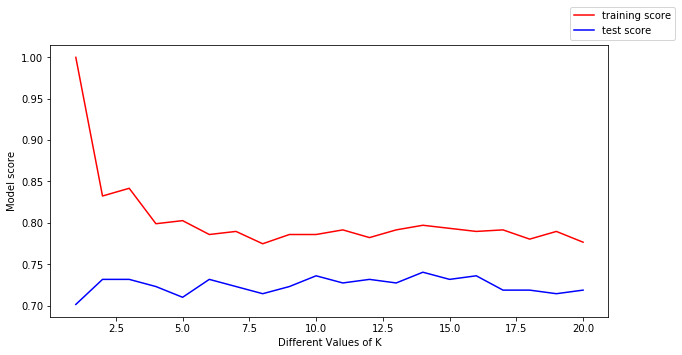

In [17]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors = 14)

#Fit the model
knn.fit(X_train,y_train)

#get the score
knn.score(X_test,y_test)

0.7402597402597403